<a href="https://colab.research.google.com/github/guilhermelaviola/DataScienceAreaAndPopulation/blob/main/AfricaPopulationStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset and displying the first 10 rows:
df = pd.read_excel('World_population.xlsx')
df.head(10)

,Country,% Africa,Total population,% growth,Official figure,Official date checked
0,Nigeria,0.153,223804632,0.024,216783400,2022-03-21
1,Ethiopia,0.087,126527060,0.026,107334000,2023-07-01
2,Egypt,0.077,111942661,0.016,102060688,2021-07-01
3,DR Congo,0.070,102262809,0.033,95370000,2019-07-01
4,Tanzania,0.046,67438106,0.030,61741120,2022-08-23
5,South Africa,0.041,59414495,0.009,59604992,2022-07-01
6,Kenya,0.038,55100587,0.020,51526000,2023-01-01
7,Uganda,0.033,48582334,0.028,41583600,2020-07-01
8,Sudan,0.033,48109006,0.026,41984500,2018-07-01
9,Algeria,0.031,45606481,0.016,44700000,2021-01-01


In [3]:
# Displaying the number of rows and columns in the dataset:
df.shape

(55, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Country                55 non-null     object        
 1   % Africa               55 non-null     float64       
 2   Total population       55 non-null     int64         
 3   % growth               55 non-null     float64       
 4   Official figure        55 non-null     int64         
 5   Official date checked  55 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.7+ KB


In [5]:
# Creating a datetime object based on the dates from the dataset:
df['Official date checked'] = df['Official date checked'].map(pd.to_datetime)
df['Day Checked'] = df['Official date checked'].apply(lambda x : x.day)
df['Month Checked'] = df['Official date checked'].apply(lambda x : x.month)
df['Year Checked'] = df['Official date checked'].apply(lambda x : x.year)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Country                55 non-null     object        
 1   % Africa               55 non-null     float64       
 2   Total population       55 non-null     int64         
 3   % growth               55 non-null     float64       
 4   Official figure        55 non-null     int64         
 5   Official date checked  55 non-null     datetime64[ns]
 6   Day Checked            55 non-null     int64         
 7   Month Checked          55 non-null     int64         
 8   Year Checked           55 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 4.0+ KB


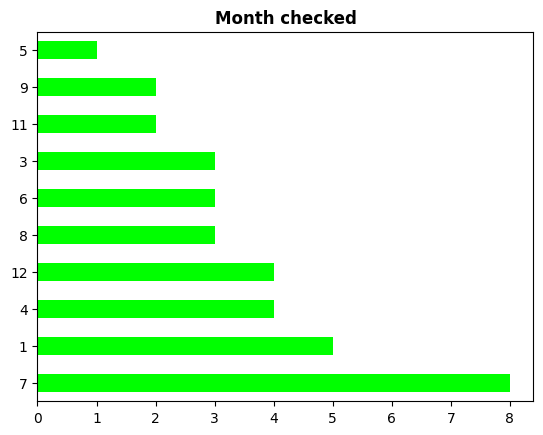

In [7]:
# Displaying distibution of months in which data was checked:
df.groupby('Official date checked').first()['Month Checked'].value_counts().plot(kind = 'barh', color = 'lime')
plt.ylabel(None)
plt.title('Month checked', fontweight = 'bold')
plt.show()

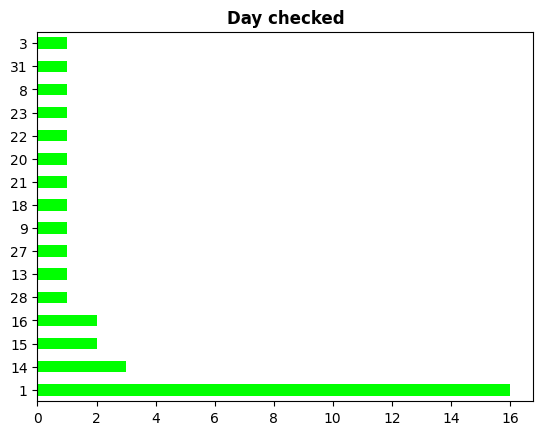

In [8]:
# Displaying distibution of days in which data was checked:
df.groupby('Official date checked').first()['Day Checked'].value_counts().plot(kind = 'barh', color = 'lime')
plt.ylabel(None)
plt.title('Day checked', fontweight = 'bold')
plt.show()

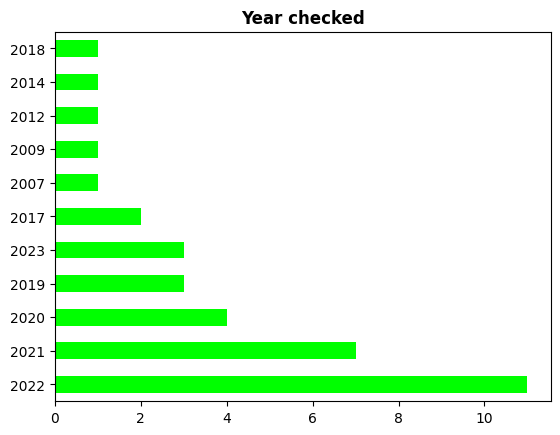

In [9]:
# Displaying distibution of years in which data was checked:
df.groupby('Official date checked').first()['Year Checked'].value_counts().plot(kind = 'barh', color = 'lime')
plt.ylabel(None)
plt.title('Year checked', fontweight = 'bold')
plt.show()

In [13]:
# Function that classifies a population based on its size:
def population_size(population):
  if population >= 200000000:
    result = 'Massive'
  elif population >= 150000000 and population < 199000000:
    result = 'Huge'
  elif population >= 100000000 and population < 149000000:
    result = 'Large'
  elif population >= 50000000 and population < 99000000:
    result = 'Big'
  elif population >= 10000000 and population < 49000000:
    result = 'Average'
  else:
    result = 'Small'
  return result

df['Population classification'] = df['Official figure'].apply(population_size)
df.head(10)

,Country,% Africa,Total population,% growth,Official figure,Official date checked,Day Checked,Month Checked,Year Checked,Population classification
0,Nigeria,0.153,223804632,0.024,216783400,2022-03-21,21,3,2022,Massive
1,Ethiopia,0.087,126527060,0.026,107334000,2023-07-01,1,7,2023,Large
2,Egypt,0.077,111942661,0.016,102060688,2021-07-01,1,7,2021,Large
3,DR Congo,0.070,102262809,0.033,95370000,2019-07-01,1,7,2019,Big
4,Tanzania,0.046,67438106,0.030,61741120,2022-08-23,23,8,2022,Big
5,South Africa,0.041,59414495,0.009,59604992,2022-07-01,1,7,2022,Big
6,Kenya,0.038,55100587,0.020,51526000,2023-01-01,1,1,2023,Big
7,Uganda,0.033,48582334,0.028,41583600,2020-07-01,1,7,2020,Average
8,Sudan,0.033,48109006,0.026,41984500,2018-07-01,1,7,2018,Average
9,Algeria,0.031,45606481,0.016,44700000,2021-01-01,1,1,2021,Average


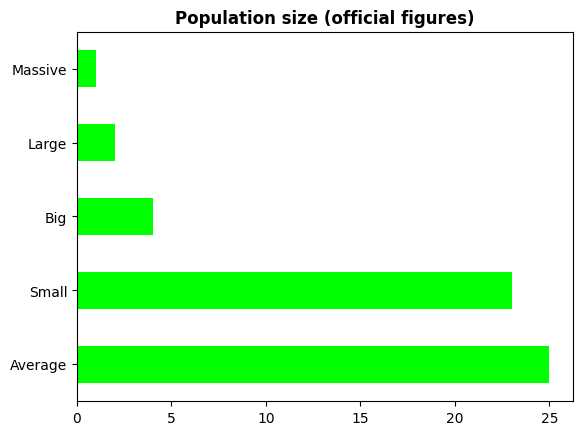

In [14]:
# Displaying the population classification for the official figures based on the algorithm above:
df['Population classification'].value_counts().plot(kind = 'barh', color = 'lime')
plt.ylabel(None)
plt.title('Population size (official figures)', fontweight = 'bold')
plt.show()

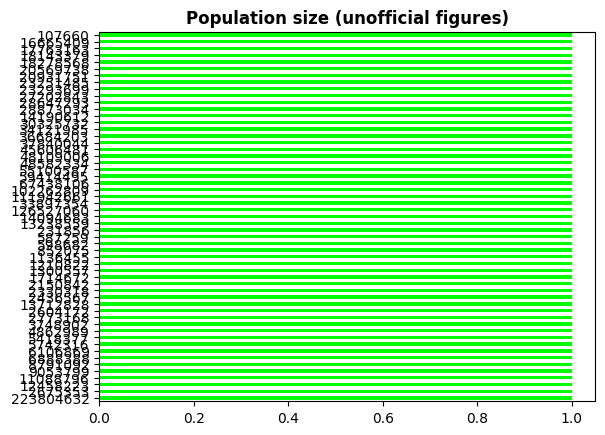

In [17]:
# Applying the same function on the total population column:
df['Population classification (unofficial)'] = df['Total population'].apply(population_size)

# Displaying the population classification for the unofficial figures based on the algorithm above:
df['Total population'].value_counts().plot(kind = 'barh', color = 'lime')
plt.ylabel(None)
plt.title('Population size (unofficial figures)', fontweight = 'bold')
plt.show()